# REGISTRATION NUMBER: 25RP18631

# IMPORTING Libraries to be used

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import numpy as np

# 1.LOAD THE DATA SET

In [41]:
data = pd.read_csv("25RP18631.csv")
# Preview the dataset
data.head()

,Unnamed: 0,Temperature,Crop_Yield
0,0,27.483571,58.922301
1,1,24.308678,44.070420
2,2,28.238443,63.490857
3,3,32.615149,58.221043
4,4,23.829233,50.592752


# 2.a. THE LOWEST AND HIGHEST TEMPERATURE VALUE

In [31]:
min_temp = data["Temperature"].min()
max_temp = data["Temperature"].max()

print("Lowest Temperature is :", min_temp)
print("Highest Temperature is :", max_temp)


Lowest Temperature is : 11.90127448
Highest Temperature is : 37.31621056


# 2.b.The lowest and highest crop yield values are: 

In [32]:
min_yield = data["Crop_Yield"].min()
max_yield = data["Crop_Yield"].max()

print("Lowest Crop Yield is :", min_yield)
print("Highest Crop Yield is :", max_yield)


Lowest Crop Yield is : 24.40945936
Highest Crop Yield is : 74.39633178


# 3. To separate datadaset into features (X) and target (y)

In [33]:
X = data[["Temperature"]]
y = data["Crop_Yield"]


# 4.split the data into training (80%) and testing(20%) sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 5.Train the model using Random forest and Linear regression models

In [35]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# 6. To calculates the evaluation metrics for each model. identify the best-perfomance model,
Best Performance Model is Linear Regression because 
1. It has lower MSE → predictions are closer to actual values
2. It has higher R² → better fit to the data
   see the codes below

In [36]:
# Predictions
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)

# Metrics
lr_mse = mean_squared_error(y_test, lr_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

lr_r2 = r2_score(y_test, lr_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Linear Regression MSE:", lr_mse)
print("Linear Regression R²:", lr_r2)

print("Random Forest MSE:", rf_mse)
print("Random Forest R²:", rf_r2)

Linear Regression MSE: 37.75854544001958
Linear Regression R²: 0.7167858894077912
Random Forest MSE: 41.64544532724082
Random Forest R²: 0.6876315646928997


# 7. To Save the model with my registration number: (25RP18631)

In [37]:
joblib.dump(lr, "25RP18631_model.pkl")

['25RP18631_model.pkl']

# 8. Visualize the regression line and and actual data points for both training and testing sets

C:\Users\KWIZERA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


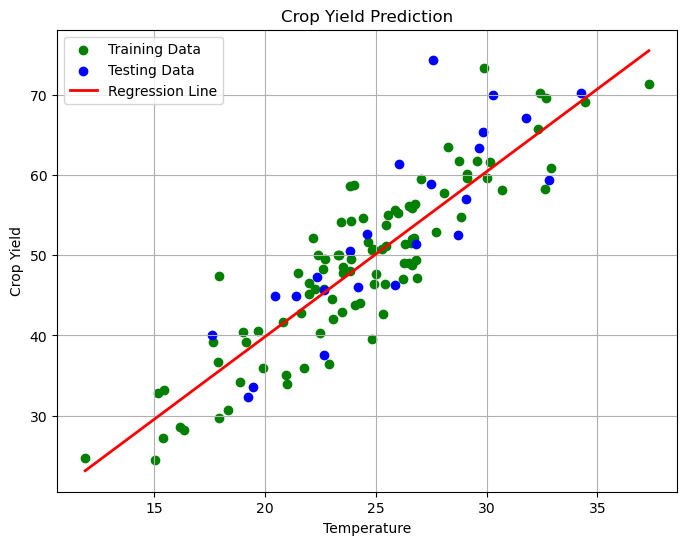

In [38]:
# Predictions for training and testing sets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Sort values for a smooth regression line
X_line = np.sort(X.values, axis=0)
y_line = lr.predict(X_line)

plt.figure(figsize=(8, 6))

# Training data points
plt.scatter(X_train, y_train, color='green', label='Training Data')

# Testing data points
plt.scatter(X_test, y_test, color='blue', label='Testing Data')

# Regression line
plt.plot(X_line, y_line, color='red', linewidth=2, label='Regression Line')

plt.xlabel("Temperature")
plt.ylabel("Crop Yield")
plt.title("Crop Yield Prediction")
plt.legend()
plt.grid(True)
plt.show()


# 9. Deployment, here i have screeshot from my Streamlit_app, that show us how results are:
# and also you can check links that are in my folder in Document named: "Links from GTHUB AND TREAMLIT app"


Below is the screenshot of the deployed Crop Yield Predictor web application:

![Crop Yield Predictor Deployment](crop_yield_deployment.png)
